In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [2]:
sns.set(style="whitegrid")

In [3]:
application_train = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/application_test.csv')
bureau = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/bureau_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/credit_card_balance.csv')
installments_payments = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/installments_payments.csv')
pos_cash_balance = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/POS_CASH_balance.csv')
previous_application = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/previous_application.csv')
columns_description = pd.read_csv('/content/drive/MyDrive/DATA MAGANG REK/HomeCredit_columns_description.csv', encoding='latin1')

In [ ]:
def dataset_overview(df, name):
    print(f"\n### Dataset Overview: {name} ###")
    print(f"Shape: {df.shape}\n")
    print("### Columns:")
    for idx, col in enumerate(df.columns, 1):
        print(f"{idx}. {col}")

    print("\n### Null Values and Data Types:")
    print(tabulate(df.dtypes.reset_index().rename(columns={"index": "Column", 0: "Data Type"}), headers="keys", tablefmt="pretty"))

    print("\n### Missing Value Counts:")
    print(tabulate(df.isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Count"}), headers="keys", tablefmt="pretty"))

    print("\n### Sample Rows:")
    print(tabulate(df.head(), headers="keys", tablefmt="pretty"))

In [ ]:
dataset_overview(application_train, "Application Train")
dataset_overview(application_test, "Application Test")
dataset_overview(bureau, "Bureau")
dataset_overview(bureau_balance, "Bureau Balance")
dataset_overview(credit_card_balance, "Credit Card Balance")
dataset_overview(installments_payments, "Installments Payments")
dataset_overview(pos_cash_balance, "POS CASH Balance")
dataset_overview(previous_application, "Previous Application")


### Dataset Overview: Application Train ###
Shape: (307511, 122)

### Columns:
1. SK_ID_CURR
2. TARGET
3. NAME_CONTRACT_TYPE
4. CODE_GENDER
5. FLAG_OWN_CAR
6. FLAG_OWN_REALTY
7. CNT_CHILDREN
8. AMT_INCOME_TOTAL
9. AMT_CREDIT
10. AMT_ANNUITY
11. AMT_GOODS_PRICE
12. NAME_TYPE_SUITE
13. NAME_INCOME_TYPE
14. NAME_EDUCATION_TYPE
15. NAME_FAMILY_STATUS
16. NAME_HOUSING_TYPE
17. REGION_POPULATION_RELATIVE
18. DAYS_BIRTH
19. DAYS_EMPLOYED
20. DAYS_REGISTRATION
21. DAYS_ID_PUBLISH
22. OWN_CAR_AGE
23. FLAG_MOBIL
24. FLAG_EMP_PHONE
25. FLAG_WORK_PHONE
26. FLAG_CONT_MOBILE
27. FLAG_PHONE
28. FLAG_EMAIL
29. OCCUPATION_TYPE
30. CNT_FAM_MEMBERS
31. REGION_RATING_CLIENT
32. REGION_RATING_CLIENT_W_CITY
33. WEEKDAY_APPR_PROCESS_START
34. HOUR_APPR_PROCESS_START
35. REG_REGION_NOT_LIVE_REGION
36. REG_REGION_NOT_WORK_REGION
37. LIVE_REGION_NOT_WORK_REGION
38. REG_CITY_NOT_LIVE_CITY
39. REG_CITY_NOT_WORK_CITY
40. LIVE_CITY_NOT_WORK_CITY
41. ORGANIZATION_TYPE
42. EXT_SOURCE_1
43. EXT_SOURCE_2
44. EXT_SOURC

In [ ]:
def statistical_summary(df, name):
    print(f"\n### Statistical Summary for {name} ###")
    summary = df.describe(include='all').T
    summary.reset_index(inplace=True)
    summary.rename(columns={'index': 'Feature'}, inplace=True)
    print(tabulate(summary, headers="keys", tablefmt="pretty"))

In [ ]:
statistical_summary(application_train, "Application Train")
statistical_summary(application_test, "Application Test")


### Statistical Summary for Application Train ###
+-----+------------------------------+----------+--------+-------------------------------+--------+------------------------+-----------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+
|     |           Feature            |  count   | unique |              top              |  freq  |          mean          |          std          |          min          |        25%         |        50%         |        75%         |        max         |
+-----+------------------------------+----------+--------+-------------------------------+--------+------------------------+-----------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+
|  0  |          SK_ID_CURR          | 307511.0 |  nan   |              nan              |  nan   |   278180.51857657125   |  102790.17534842374   |       100002.0        |      

In [ ]:
def missing_values_analysis(df, name):
    print(f"\n### Missing Values Analysis: {name} ###")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        "Missing Values": missing_values,
        "Percentage": missing_percentage
    }).sort_values(by="Percentage", ascending=False)
    missing_df = missing_df[missing_df["Missing Values"] > 0]
    print(tabulate(missing_df, headers="keys", tablefmt="pretty"))
    return missing_df

In [ ]:
missing_train = missing_values_analysis(application_train, "Application Train")
missing_test = missing_values_analysis(application_test, "Application Test")


### Missing Values Analysis: Application Train ###
+------------------------------+----------------+------------------------+
|                              | Missing Values |       Percentage       |
+------------------------------+----------------+------------------------+
|       COMMONAREA_MEDI        |    214865.0    |   69.87229725115525    |
|        COMMONAREA_AVG        |    214865.0    |   69.87229725115525    |
|       COMMONAREA_MODE        |    214865.0    |   69.87229725115525    |
|   NONLIVINGAPARTMENTS_MODE   |    213514.0    |   69.43296337366793    |
|   NONLIVINGAPARTMENTS_AVG    |    213514.0    |   69.43296337366793    |
|   NONLIVINGAPARTMENTS_MEDI   |    213514.0    |   69.43296337366793    |
|      FONDKAPREMONT_MODE      |    210295.0    |   68.38617155158677    |
|    LIVINGAPARTMENTS_MODE     |    210199.0    |   68.35495315614726    |
|     LIVINGAPARTMENTS_AVG     |    210199.0    |   68.35495315614726    |
|    LIVINGAPARTMENTS_MEDI     |    210199.0    

In [ ]:
def visualize_missing_values(missing_df, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=missing_df.index[:20],
        y=missing_df['Percentage'][:20],
        palette="coolwarm"
    )
    plt.xticks(rotation=90)
    plt.title(f"Top 20 Missing Values: {title}")
    plt.ylabel("Percentage")
    plt.xlabel("Feature")
    plt.show()

<ipython-input-11-6f139facb5c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


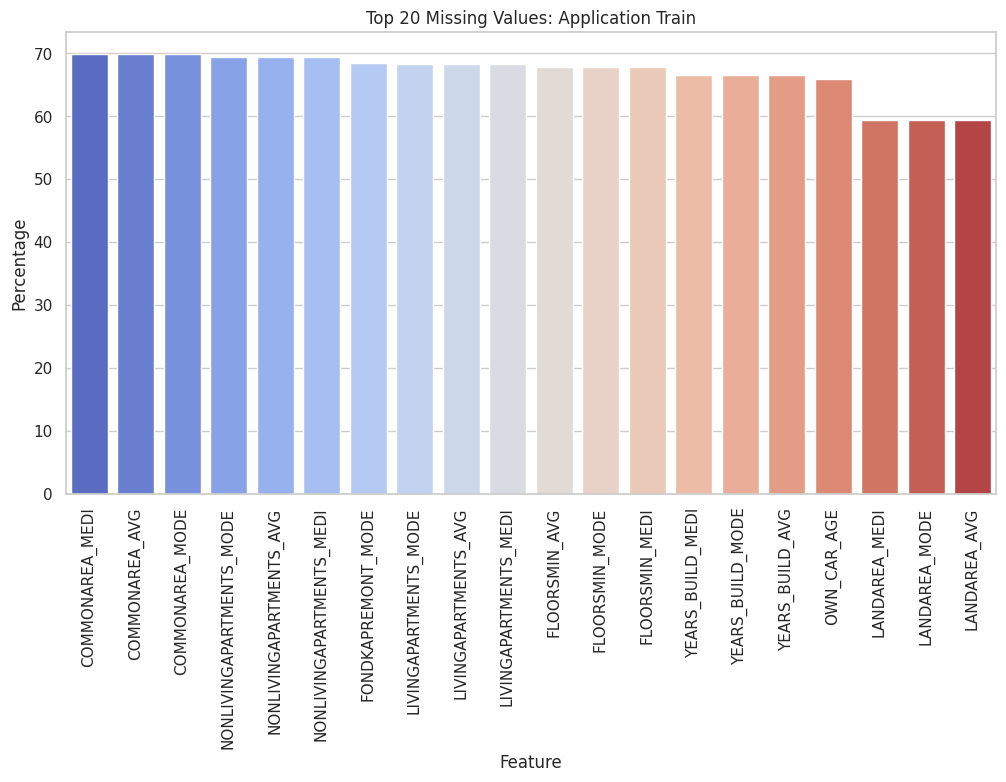

<ipython-input-11-6f139facb5c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


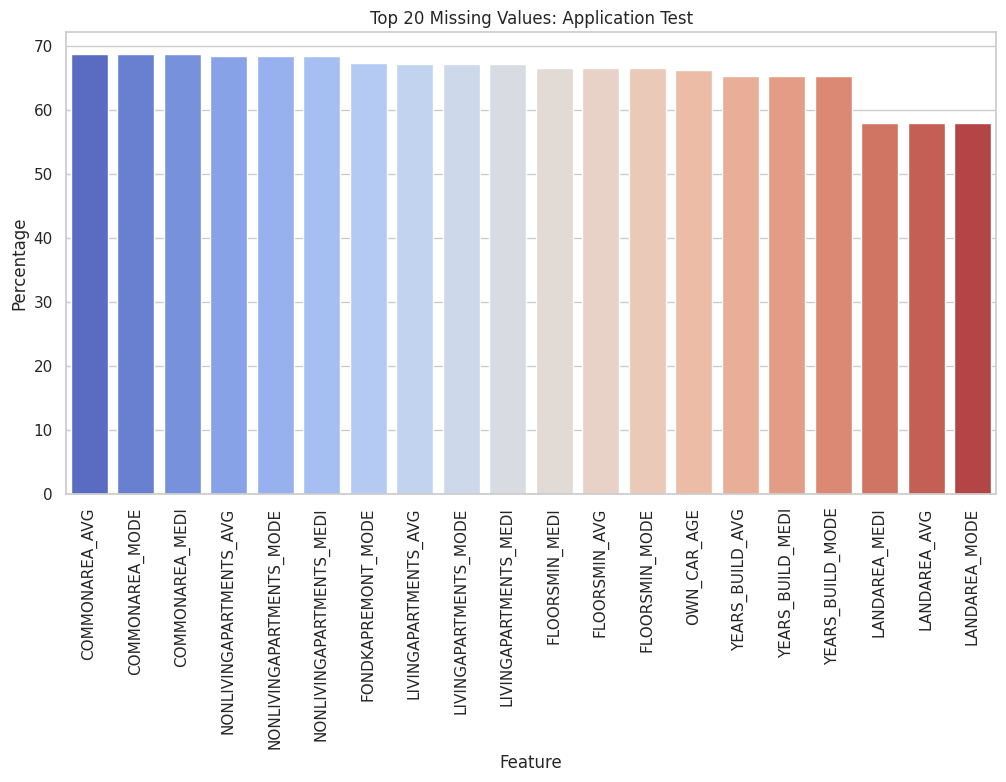

In [ ]:
visualize_missing_values(missing_train, "Application Train")
visualize_missing_values(missing_test, "Application Test")

In [ ]:
target_counts = application_train['TARGET'].value_counts()
target_percentage = (target_counts / len(application_train)) * 100
print("\n### Target Variable Analysis ###")
print(target_counts)
print(target_percentage)


### Target Variable Analysis ###
TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64


<ipython-input-14-87673229e911>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


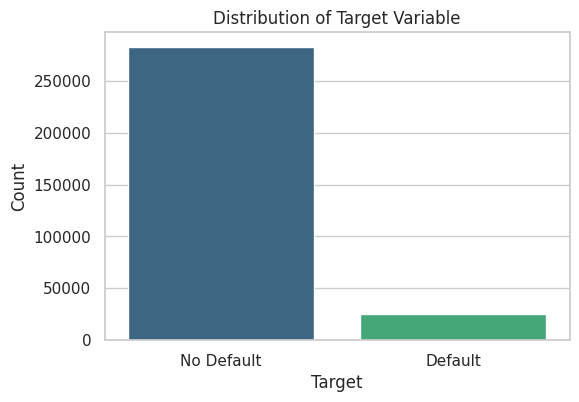

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xticks([0, 1], labels=["No Default", "Default"])
plt.ylabel("Count")
plt.xlabel("Target")
plt.show()

<ipython-input-7-f53c225ba08d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x=target, y=feature, palette='coolwarm')
<ipython-input-7-f53c225ba08d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x=target, y=feature, palette='coolwarm')
<ipython-input-7-f53c225ba08d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x=target, y=feature, palette='coolwarm')
<ipython-input-7-f53c225ba08d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

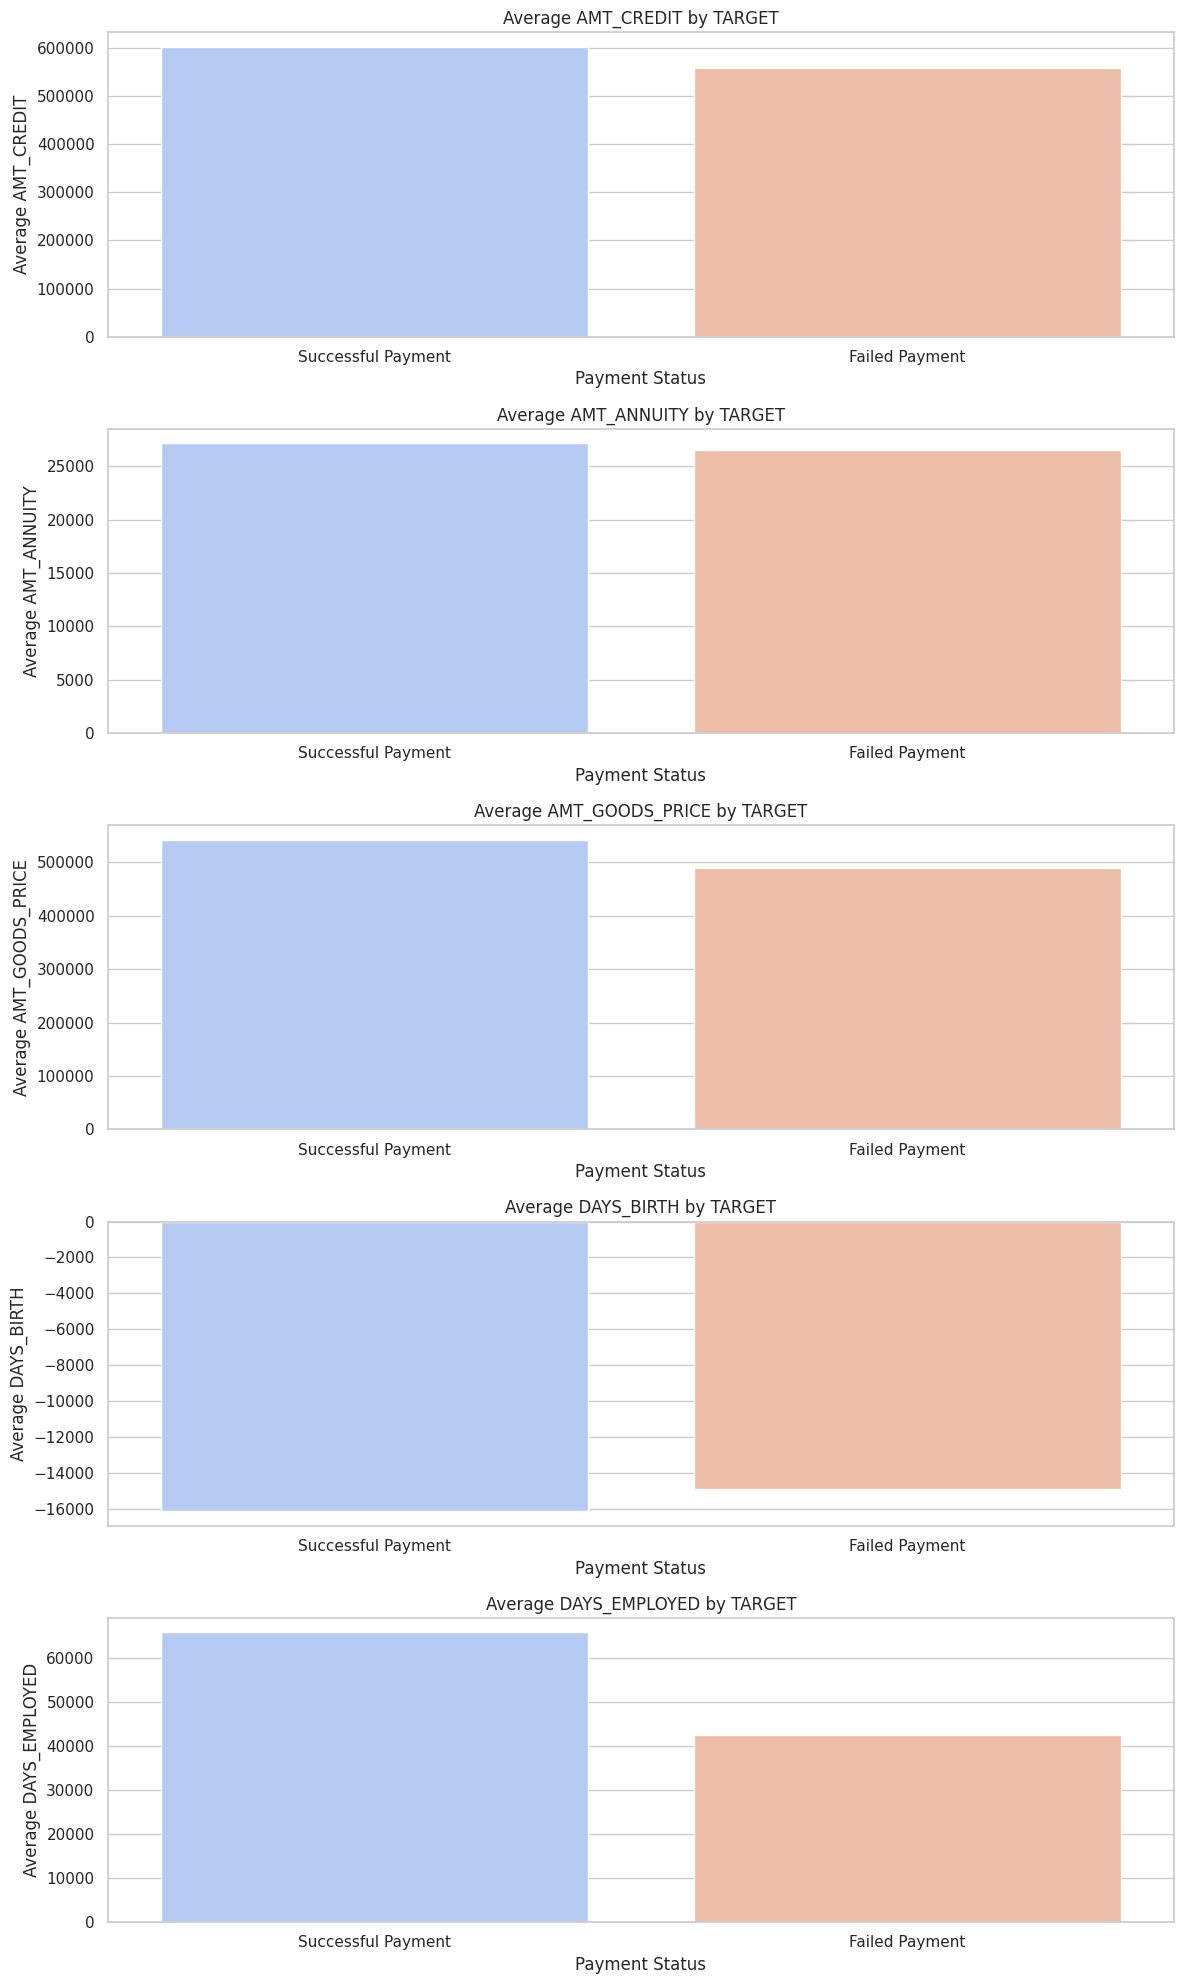

In [7]:
def plot_multiple_bar_distributions_by_target(df, features, target='TARGET'):
    num_features = len(features)
    plt.figure(figsize=(12, 4 * num_features))

    for i, feature in enumerate(features):
        plt.subplot(num_features, 1, i + 1)

        mean_values = df.groupby(target)[feature].mean().reset_index()

        sns.barplot(data=mean_values, x=target, y=feature, palette='coolwarm')
        plt.title(f'Average {feature} by {target}')
        plt.xlabel('Payment Status')
        plt.ylabel(f'Average {feature}')
        plt.xticks(ticks=[0, 1], labels=['Successful Payment', 'Failed Payment'])

    plt.tight_layout()
    plt.show()

features_to_plot = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
plot_multiple_bar_distributions_by_target(application_train, features_to_plot)

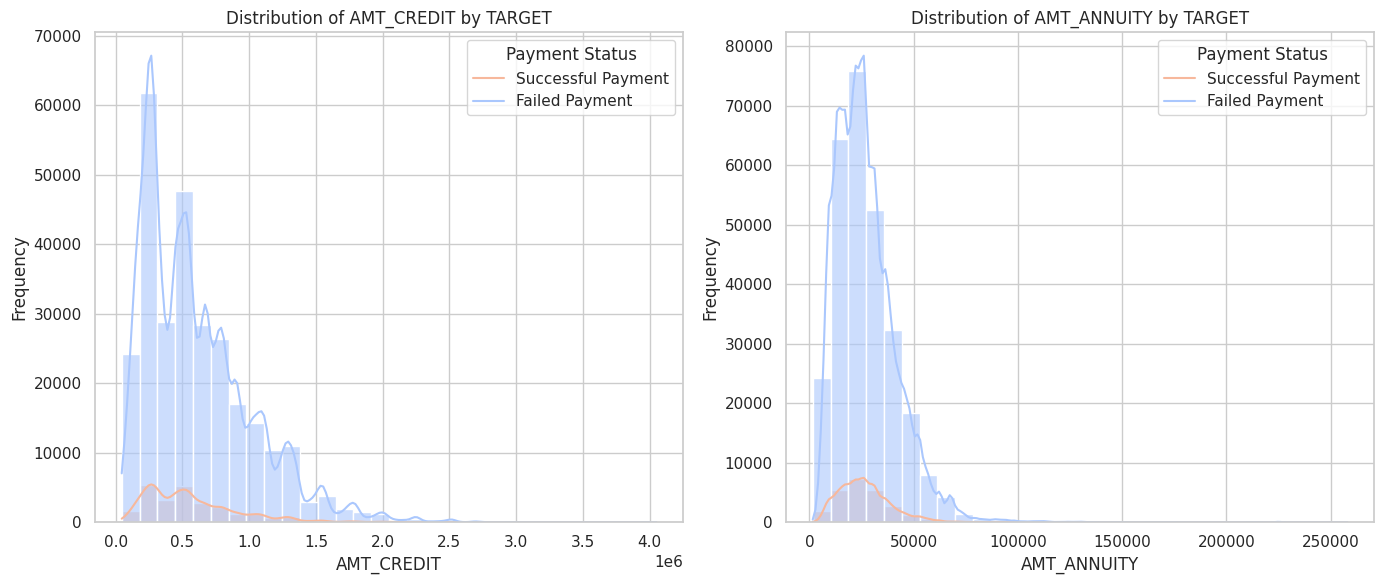

In [8]:
def plot_comparison_distributions(df, features, target='TARGET'):
    plt.figure(figsize=(14, 6))

    for i, feature in enumerate(features):
        plt.subplot(1, 2, i + 1)

        sns.histplot(data=df, x=feature, hue=target, kde=True, palette='coolwarm', bins=30, alpha=0.6)
        plt.title(f'Distribution of {feature} by {target}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend(title='Payment Status', labels=['Successful Payment', 'Failed Payment'])

    plt.tight_layout()
    plt.show()

features_to_compare = ['AMT_CREDIT', 'AMT_ANNUITY']
plot_comparison_distributions(application_train, features_to_compare)

In [ ]:
def correlation_analysis(df, target_col):
    numeric_df = df.select_dtypes(include=np.number)
    if target_col not in numeric_df.columns:
        raise ValueError(f"{target_col} not found in numerical columns.")

    corr_matrix = numeric_df.corr()
    target_corr = corr_matrix[target_col].sort_values(ascending=False)

    print("\n### Top Correlations with Target ###")
    print(target_corr.head(10))
    print("\n### Lowest Correlations with Target ###")
    print(target_corr.tail(10))

    return target_corr

In [ ]:
target_corr = correlation_analysis(application_train, 'TARGET')


### Top Correlations with Target ###
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

### Lowest Correlations with Target ###
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


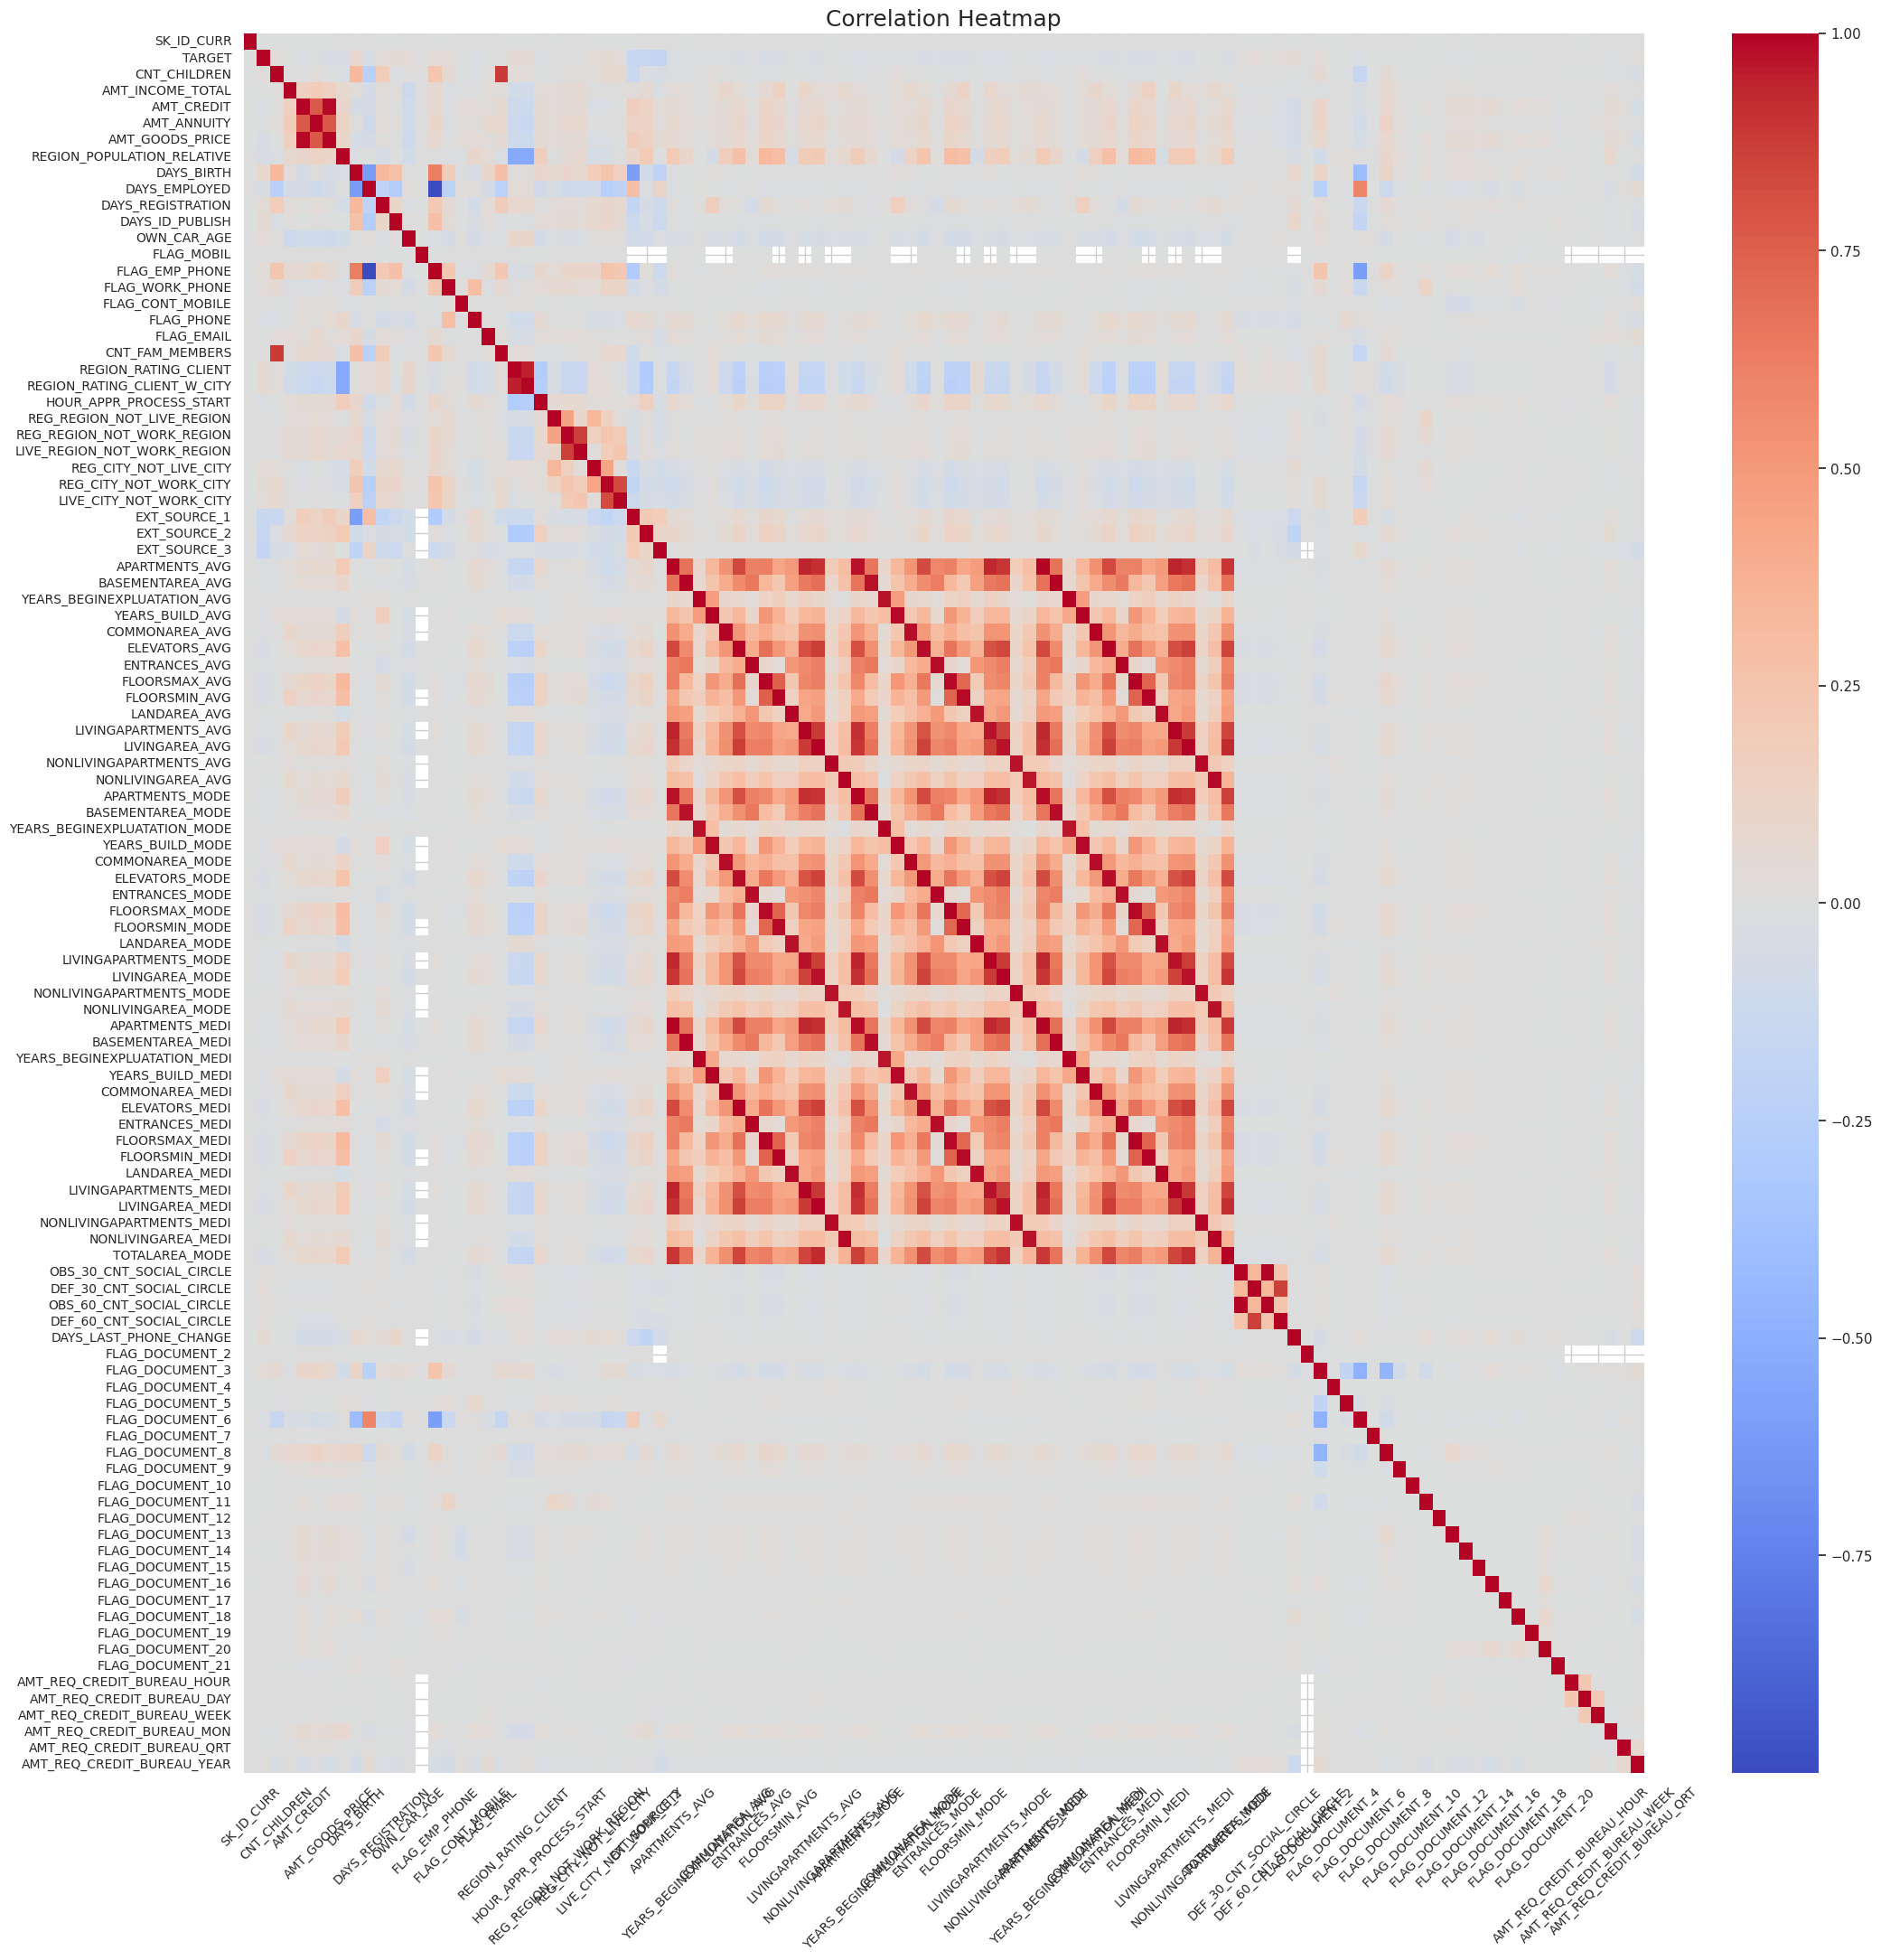

In [ ]:
numeric_data = application_train.select_dtypes(include=np.number)

corr_matrix = numeric_data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [ ]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers

In [ ]:
outliers_income, income_outliers_df = detect_outliers(application_train, 'AMT_INCOME_TOTAL')
print(f"\n### Outlier Analysis for AMT_INCOME_TOTAL ###")
income_outliers_df.to_csv("income_outliers.csv", index=False)
print("Outliers saved to income_outliers.csv")


### Outlier Analysis for AMT_INCOME_TOTAL ###
Outliers saved to income_outliers.csv


In [ ]:
def skewness_kurtosis_analysis(df, columns):
    for col in columns:
        if col in df.columns:
            skewness = skew(df[col].dropna())
            kurt = kurtosis(df[col].dropna())
            print(f"\n### Skewness and Kurtosis for {col} ###")
            print(f"Skewness: {skewness}")
            print(f"Kurtosis: {kurt}")

In [ ]:
skewness_kurtosis_analysis(application_train, ['AMT_CREDIT', 'AMT_INCOME_TOTAL'])


### Skewness and Kurtosis for AMT_CREDIT ###
Skewness: 1.234772474032497
Kurtosis: 1.9339903428408523

### Skewness and Kurtosis for AMT_INCOME_TOTAL ###
Skewness: 391.55774412283097
Kurtosis: 191783.43600648205


In [ ]:
def plot_distributions(df, columns, title):
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col].dropna(), kde=True, color="blue")
        plt.title(f"{col} Distribution")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

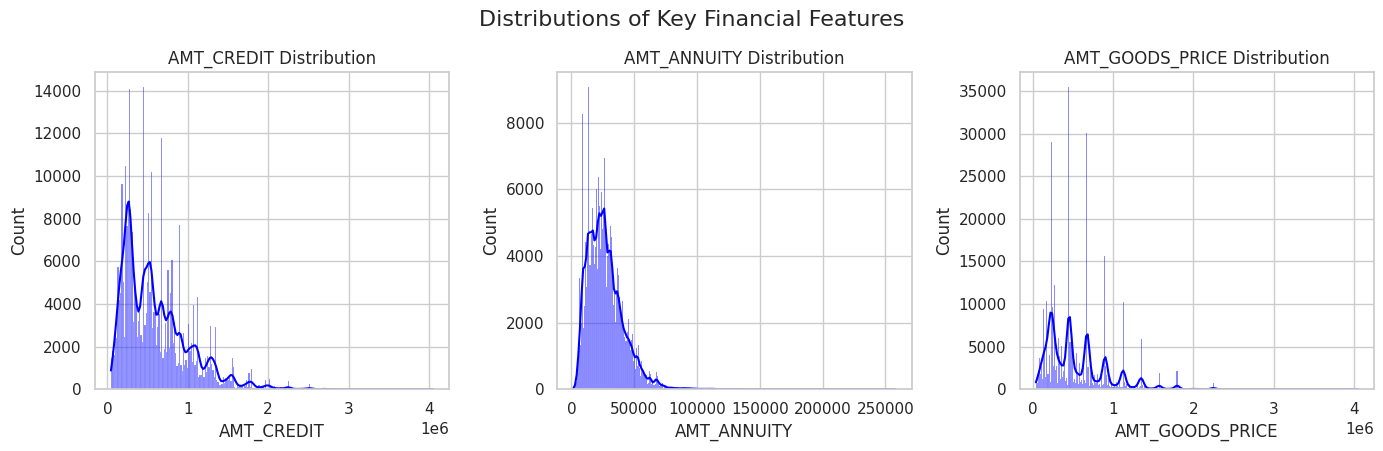

In [ ]:
plot_distributions(application_train, ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], "Distributions of Key Financial Features")

In [ ]:
def feature_relationships(df, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['TARGET'], palette="viridis", alpha=0.6)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

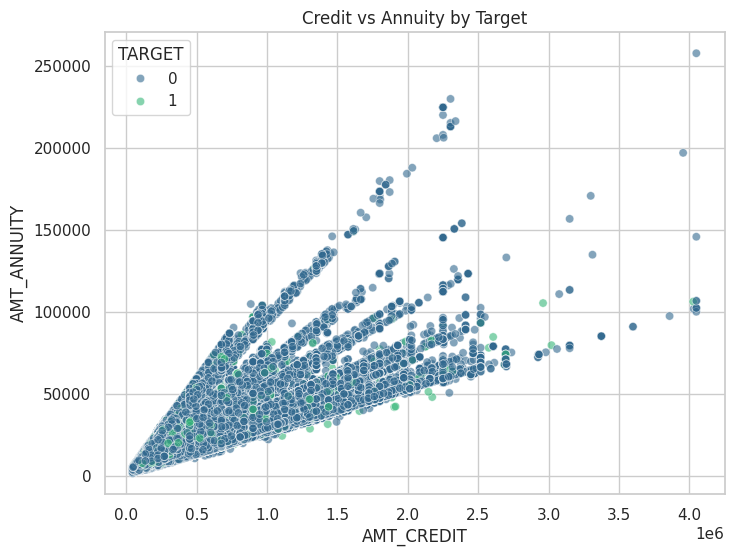

In [ ]:
feature_relationships(application_train, 'AMT_CREDIT', 'AMT_ANNUITY', "Credit vs Annuity by Target")

In [ ]:
def eda_additional_dataset(df, name, id_col=None):
    print(f"\n### Dataset Overview: {name} ###")
    print(f"Shape: {df.shape}\n")

    print("### Columns and Data Types:")
    print(tabulate(df.dtypes.reset_index().rename(columns={"index": "Column", 0: "Data Type"}), headers="keys", tablefmt="pretty"))

    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        "Feature": df.columns,
        "Missing Values": missing_values,
        "Percentage": missing_percentage
    }).sort_values(by="Percentage", ascending=False)
    print("\n### Missing Values:")
    print(tabulate(missing_df[missing_df["Missing Values"] > 0], headers="keys", tablefmt="pretty"))

    print("\n### Descriptive Statistics:")
    print(tabulate(df.describe(include='all').T.reset_index().rename(columns={"index": "Feature"}), headers="keys", tablefmt="pretty"))

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=missing_df["Feature"][:20],
        y=missing_df["Percentage"][:20],
        palette="coolwarm"
    )
    plt.xticks(rotation=90)
    plt.title(f"Top 20 Missing Values in {name}")
    plt.ylabel("Percentage")
    plt.xlabel("Feature")
    plt.show()

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n### Distribution of Numerical Features in {name} ###")
        for col in numeric_cols[:6]:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[col].dropna(), kde=True, bins=30, color="blue")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()

    if id_col:
        unique_ids = df[id_col].nunique()
        print(f"\n### Unique IDs in {id_col}: {unique_ids}")

    return missing_df


### Dataset Overview: Bureau ###
Shape: (1716428, 17)

### Columns and Data Types:
+----+------------------------+-----------+
|    |         Column         | Data Type |
+----+------------------------+-----------+
| 0  |       SK_ID_CURR       |   int64   |
| 1  |      SK_ID_BUREAU      |   int64   |
| 2  |     CREDIT_ACTIVE      |  object   |
| 3  |    CREDIT_CURRENCY     |  object   |
| 4  |      DAYS_CREDIT       |   int64   |
| 5  |   CREDIT_DAY_OVERDUE   |   int64   |
| 6  |  DAYS_CREDIT_ENDDATE   |  float64  |
| 7  |   DAYS_ENDDATE_FACT    |  float64  |
| 8  | AMT_CREDIT_MAX_OVERDUE |  float64  |
| 9  |   CNT_CREDIT_PROLONG   |   int64   |
| 10 |     AMT_CREDIT_SUM     |  float64  |
| 11 |  AMT_CREDIT_SUM_DEBT   |  float64  |
| 12 |  AMT_CREDIT_SUM_LIMIT  |  float64  |
| 13 | AMT_CREDIT_SUM_OVERDUE |  float64  |
| 14 |      CREDIT_TYPE       |  object   |
| 15 |   DAYS_CREDIT_UPDATE   |   int64   |
| 16 |      AMT_ANNUITY       |  float64  |
+----+------------------------+-----

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


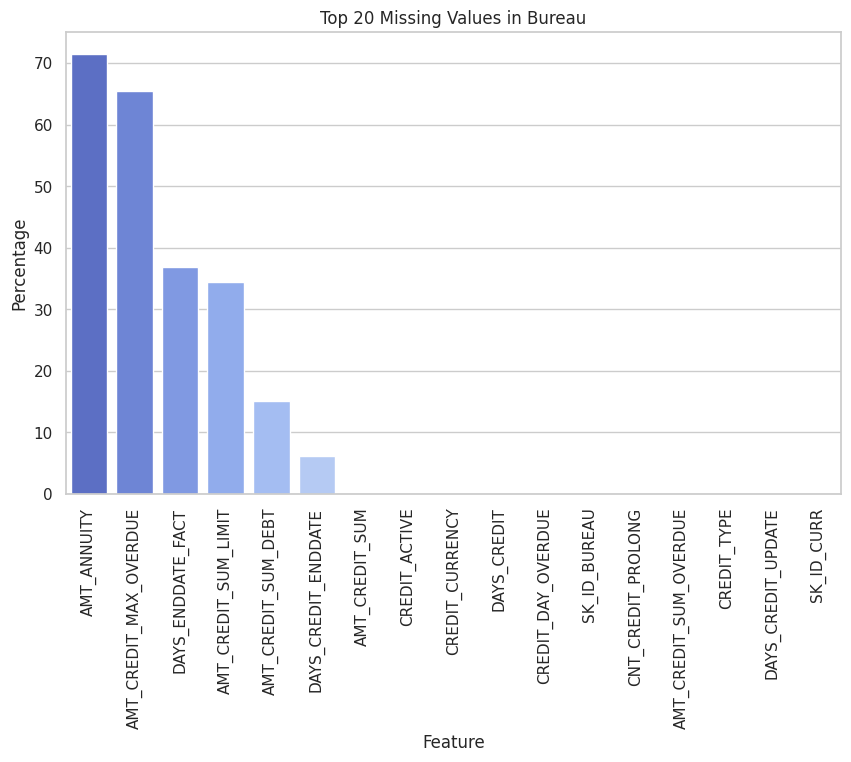


### Distribution of Numerical Features in Bureau ###


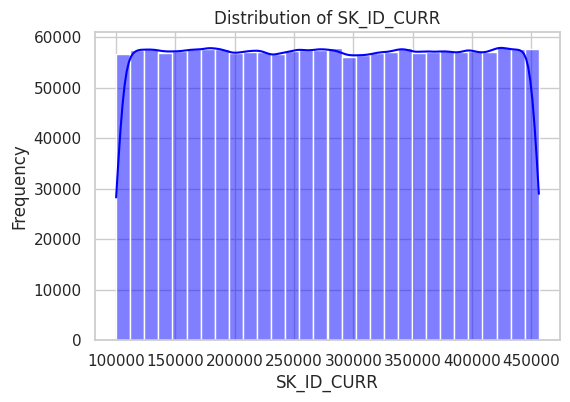

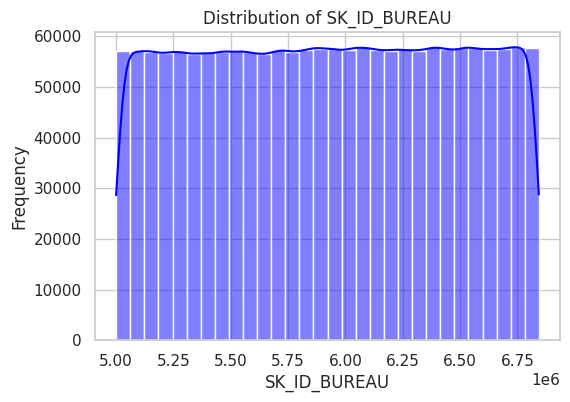

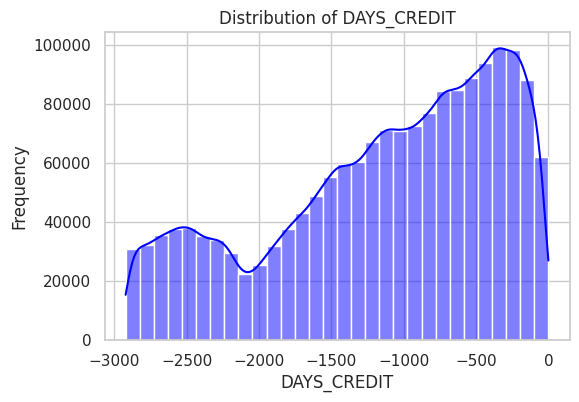

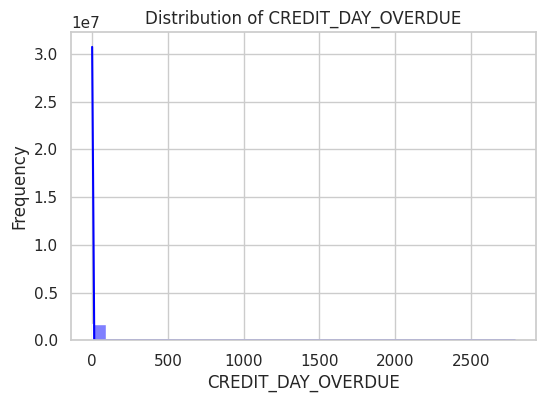

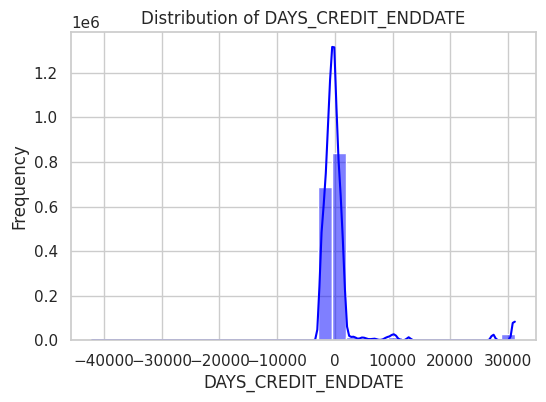

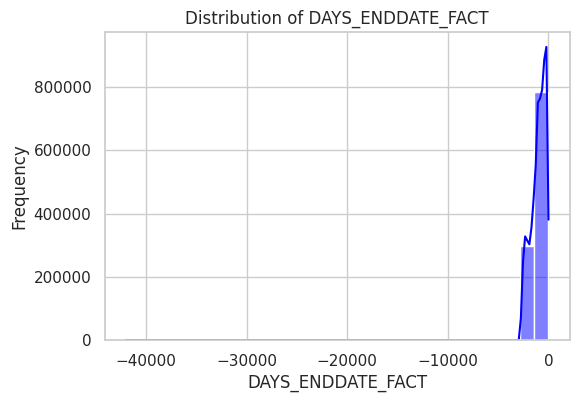


### Unique IDs in SK_ID_CURR: 305811

### Bureau: Features with High Missing Values ( > 50%) ###
['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE']


In [ ]:
missing_bureau = eda_additional_dataset(bureau, "Bureau", id_col="SK_ID_CURR")
high_missing_features_bureau = missing_bureau[missing_bureau["Percentage"] > 50]["Feature"].tolist()
print("\n### Bureau: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_bureau)


### Dataset Overview: Bureau Balance ###
Shape: (27299925, 3)

### Columns and Data Types:
+---+----------------+-----------+
|   |     Column     | Data Type |
+---+----------------+-----------+
| 0 |  SK_ID_BUREAU  |   int64   |
| 1 | MONTHS_BALANCE |   int64   |
| 2 |     STATUS     |  object   |
+---+----------------+-----------+

### Missing Values:
+---------+----------------+------------+
| Feature | Missing Values | Percentage |
+---------+----------------+------------+
+---------+----------------+------------+

### Descriptive Statistics:
+---+----------------+------------+--------+-----+----------+--------------------+-------------------+-----------+-----------+-----------+-----------+-----------+
|   |    Feature     |   count    | unique | top |   freq   |        mean        |        std        |    min    |    25%    |    50%    |    75%    |    max    |
+---+----------------+------------+--------+-----+----------+--------------------+-------------------+-----------+-----

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


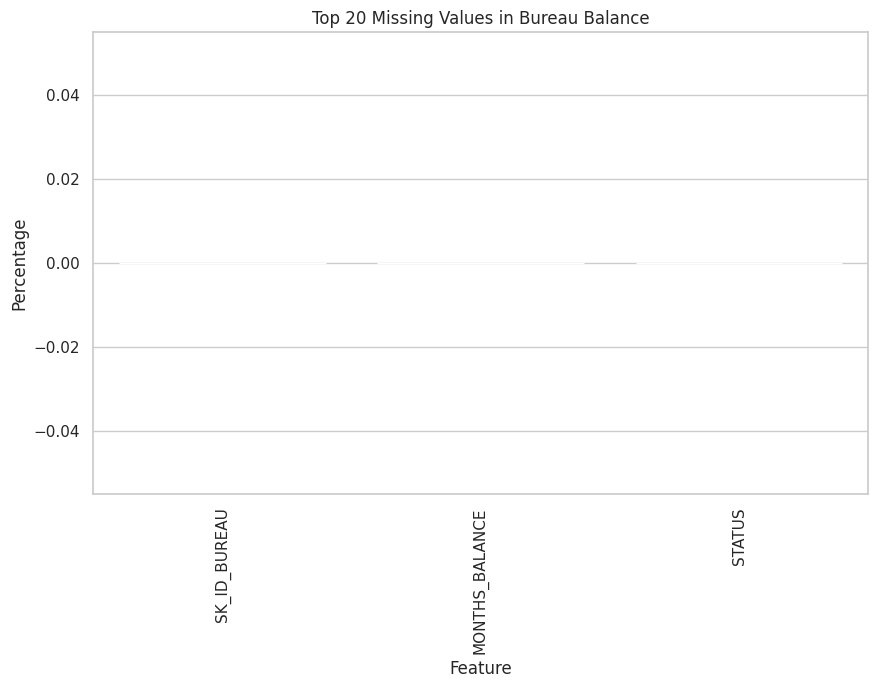


### Distribution of Numerical Features in Bureau Balance ###


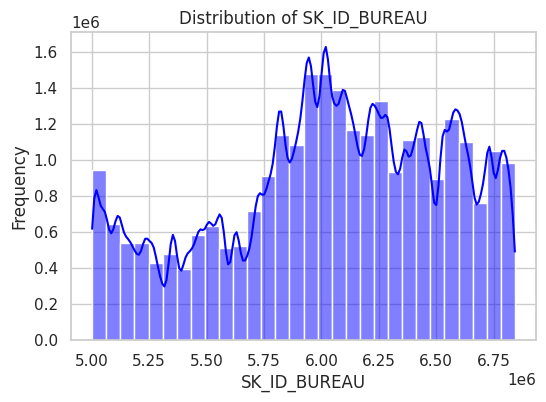

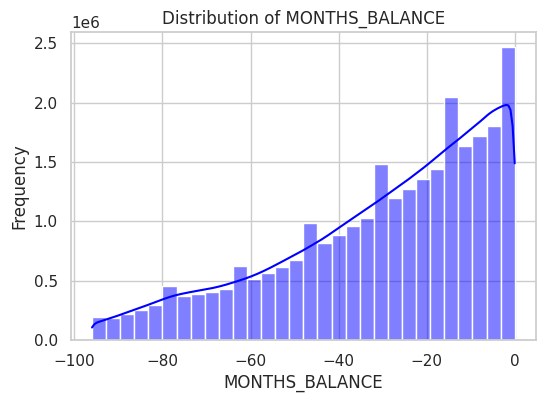


### Unique IDs in SK_ID_BUREAU: 817395

### Bureau Balance: Features with High Missing Values ( > 50%) ###
[]


In [ ]:
missing_bureau_balance = eda_additional_dataset(bureau_balance, "Bureau Balance", id_col="SK_ID_BUREAU")
high_missing_features_bureau_balance = missing_bureau_balance[missing_bureau_balance["Percentage"] > 50]["Feature"].tolist()
print("\n### Bureau Balance: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_bureau_balance)


### Dataset Overview: Credit Card Balance ###
Shape: (3840312, 23)

### Columns and Data Types:
+----+----------------------------+-----------+
|    |           Column           | Data Type |
+----+----------------------------+-----------+
| 0  |         SK_ID_PREV         |   int64   |
| 1  |         SK_ID_CURR         |   int64   |
| 2  |       MONTHS_BALANCE       |   int64   |
| 3  |        AMT_BALANCE         |  float64  |
| 4  |  AMT_CREDIT_LIMIT_ACTUAL   |   int64   |
| 5  |  AMT_DRAWINGS_ATM_CURRENT  |  float64  |
| 6  |    AMT_DRAWINGS_CURRENT    |  float64  |
| 7  | AMT_DRAWINGS_OTHER_CURRENT |  float64  |
| 8  |  AMT_DRAWINGS_POS_CURRENT  |  float64  |
| 9  |  AMT_INST_MIN_REGULARITY   |  float64  |
| 10 |    AMT_PAYMENT_CURRENT     |  float64  |
| 11 | AMT_PAYMENT_TOTAL_CURRENT  |  float64  |
| 12 |  AMT_RECEIVABLE_PRINCIPAL  |  float64  |
| 13 |       AMT_RECIVABLE        |  float64  |
| 14 |    AMT_TOTAL_RECEIVABLE    |  float64  |
| 15 |  CNT_DRAWINGS_ATM_CURRENT  |  fl

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


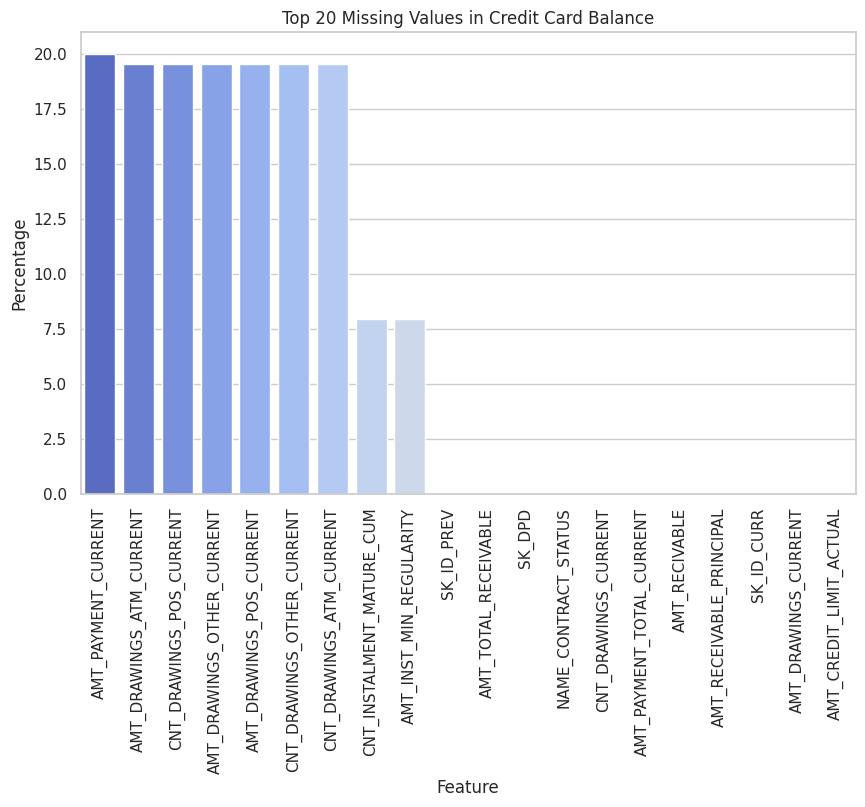


### Distribution of Numerical Features in Credit Card Balance ###


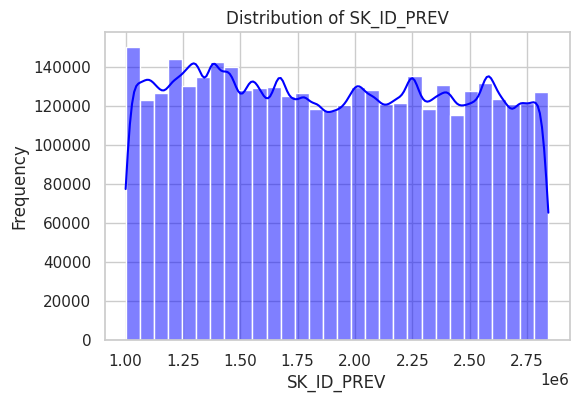

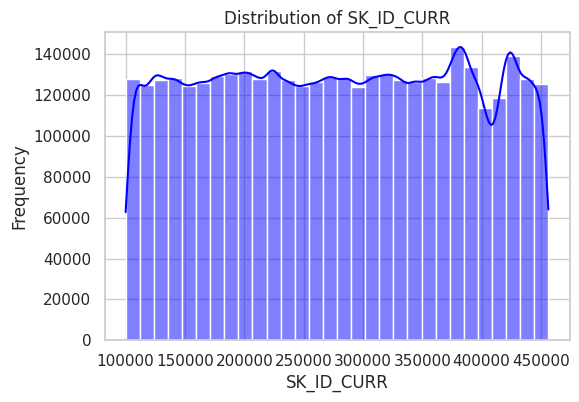

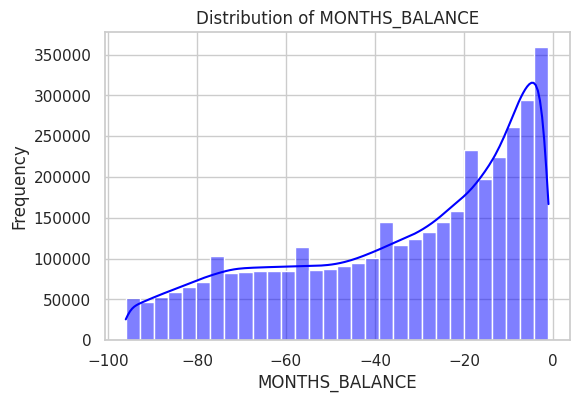

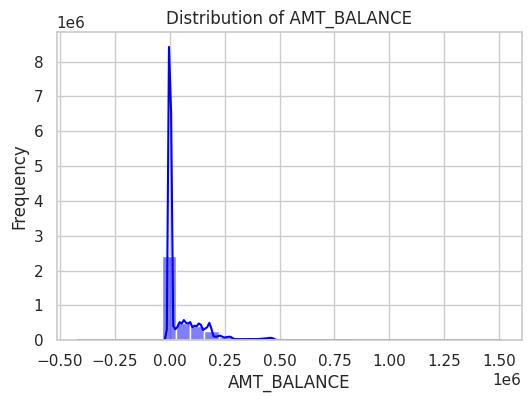

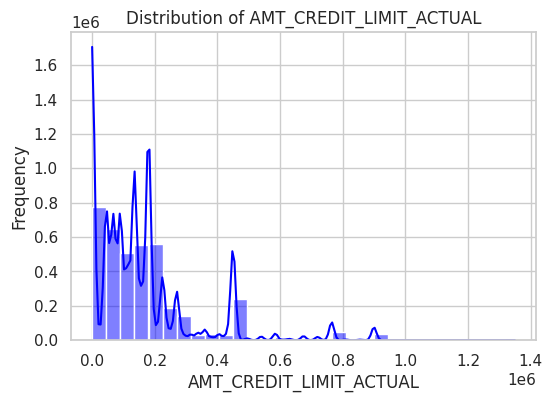

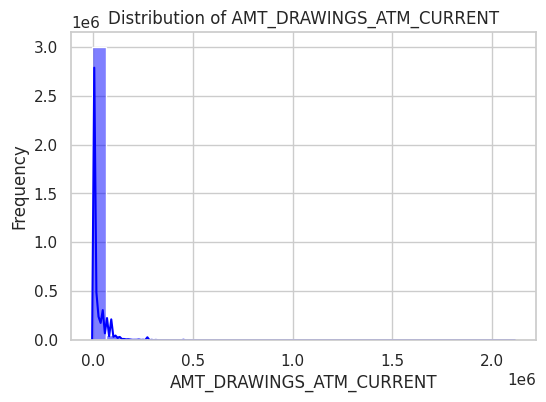


### Unique IDs in SK_ID_CURR: 103558

### Credit Card Balance: Features with High Missing Values ( > 50%) ###
[]


In [ ]:
missing_credit_card_balance = eda_additional_dataset(credit_card_balance, "Credit Card Balance", id_col="SK_ID_CURR")
high_missing_features_credit_card_balance = missing_credit_card_balance[missing_credit_card_balance["Percentage"] > 50]["Feature"].tolist()
print("\n### Credit Card Balance: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_credit_card_balance)


### Dataset Overview: Installments Payments ###
Shape: (13605401, 8)

### Columns and Data Types:
+---+------------------------+-----------+
|   |         Column         | Data Type |
+---+------------------------+-----------+
| 0 |       SK_ID_PREV       |   int64   |
| 1 |       SK_ID_CURR       |   int64   |
| 2 | NUM_INSTALMENT_VERSION |  float64  |
| 3 | NUM_INSTALMENT_NUMBER  |   int64   |
| 4 |    DAYS_INSTALMENT     |  float64  |
| 5 |   DAYS_ENTRY_PAYMENT   |  float64  |
| 6 |     AMT_INSTALMENT     |  float64  |
| 7 |      AMT_PAYMENT       |  float64  |
+---+------------------------+-----------+

### Missing Values:
+--------------------+--------------------+----------------+---------------------+
|                    |      Feature       | Missing Values |     Percentage      |
+--------------------+--------------------+----------------+---------------------+
| DAYS_ENTRY_PAYMENT | DAYS_ENTRY_PAYMENT |      2905      | 0.02135181462126695 |
|    AMT_PAYMENT     |    AMT_PA

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


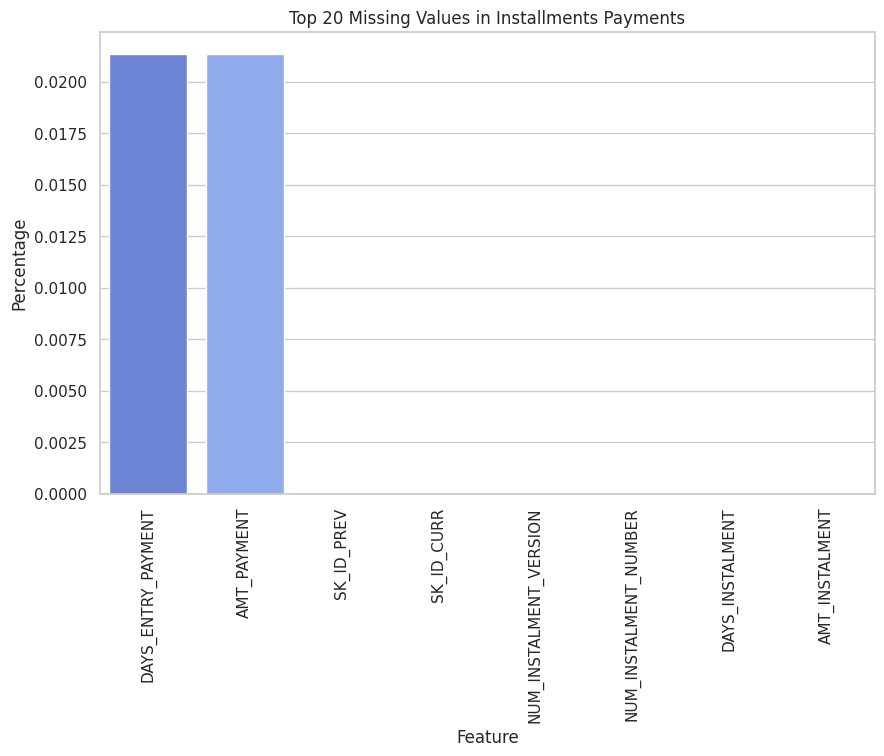


### Distribution of Numerical Features in Installments Payments ###


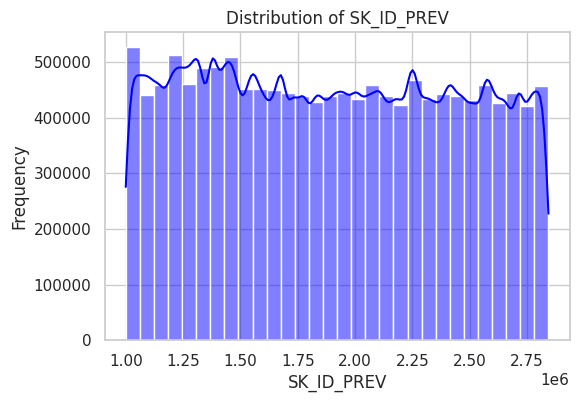

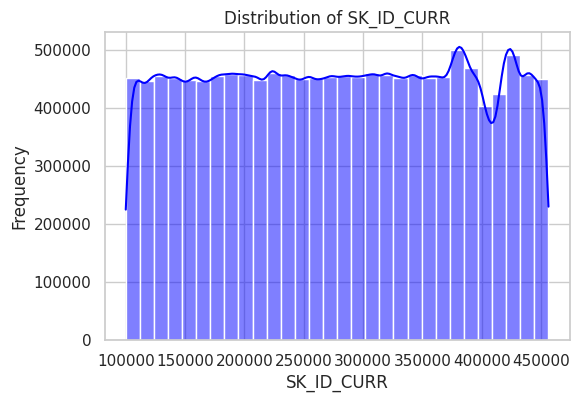

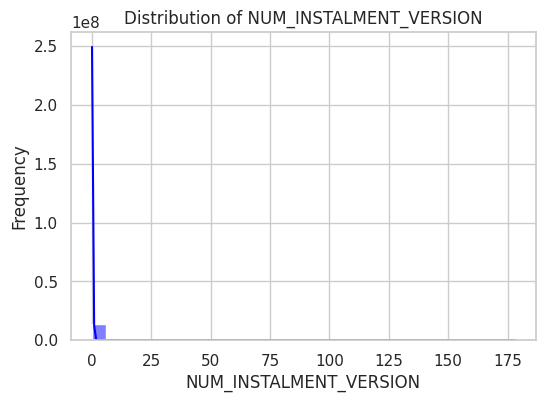

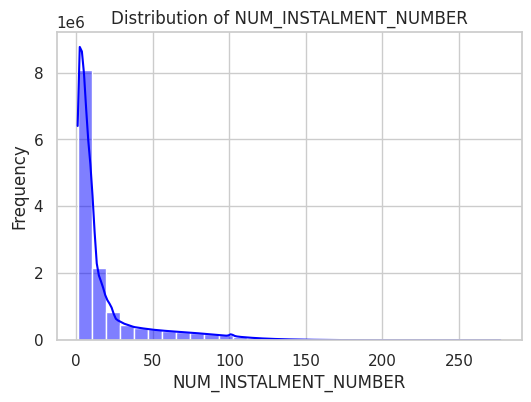

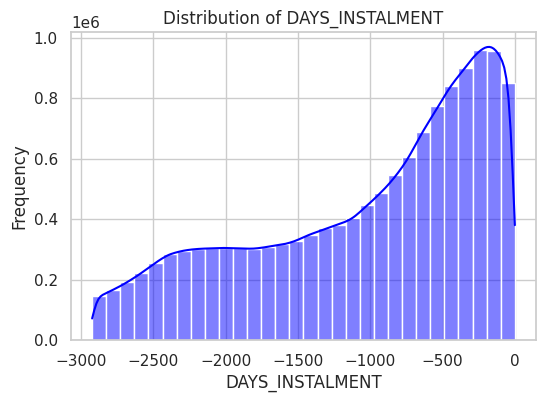

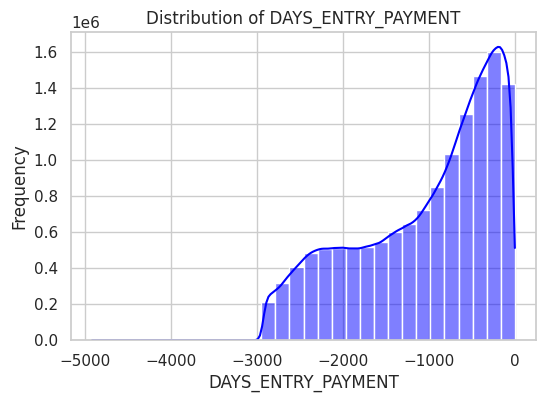


### Unique IDs in SK_ID_CURR: 339587

### Installments Payments: Features with High Missing Values ( > 50%) ###
[]


In [ ]:
missing_installments_payments = eda_additional_dataset(installments_payments, "Installments Payments", id_col="SK_ID_CURR")
high_missing_features_installments_payments = missing_installments_payments[missing_installments_payments["Percentage"] > 50]["Feature"].tolist()
print("\n### Installments Payments: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_installments_payments)


### Dataset Overview: POS CASH Balance ###
Shape: (10001358, 8)

### Columns and Data Types:
+---+-----------------------+-----------+
|   |        Column         | Data Type |
+---+-----------------------+-----------+
| 0 |      SK_ID_PREV       |   int64   |
| 1 |      SK_ID_CURR       |   int64   |
| 2 |    MONTHS_BALANCE     |   int64   |
| 3 |    CNT_INSTALMENT     |  float64  |
| 4 | CNT_INSTALMENT_FUTURE |  float64  |
| 5 | NAME_CONTRACT_STATUS  |  object   |
| 6 |        SK_DPD         |   int64   |
| 7 |      SK_DPD_DEF       |   int64   |
+---+-----------------------+-----------+

### Missing Values:
+-----------------------+-----------------------+----------------+---------------------+
|                       |        Feature        | Missing Values |     Percentage      |
+-----------------------+-----------------------+----------------+---------------------+
| CNT_INSTALMENT_FUTURE | CNT_INSTALMENT_FUTURE |     26087      | 0.2608345786642174  |
|    CNT_INSTALMENT     |

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


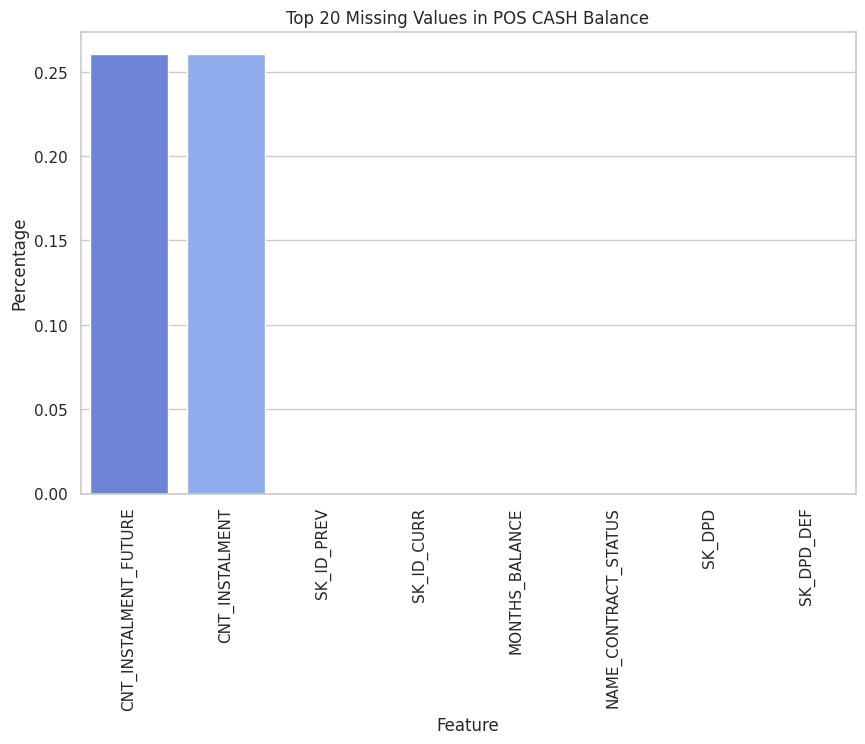


### Distribution of Numerical Features in POS CASH Balance ###


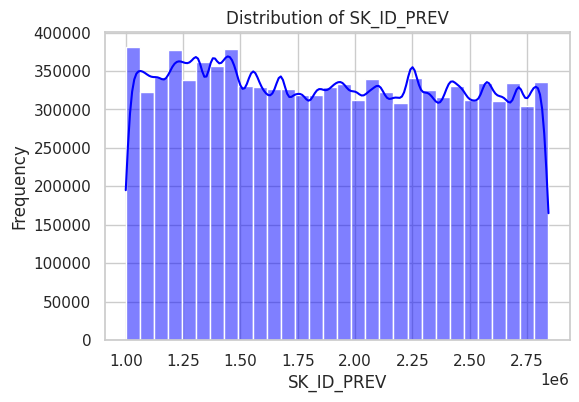

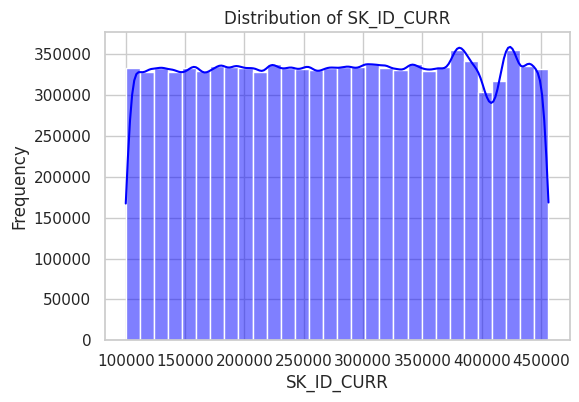

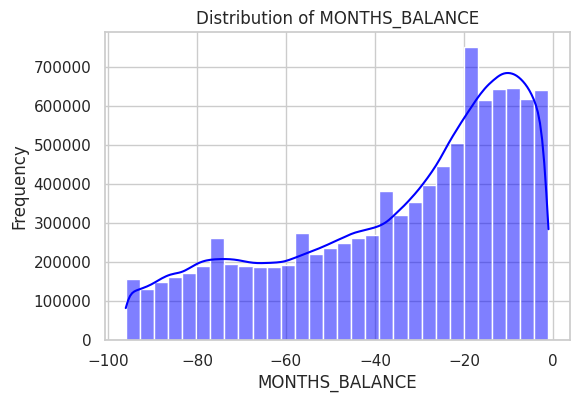

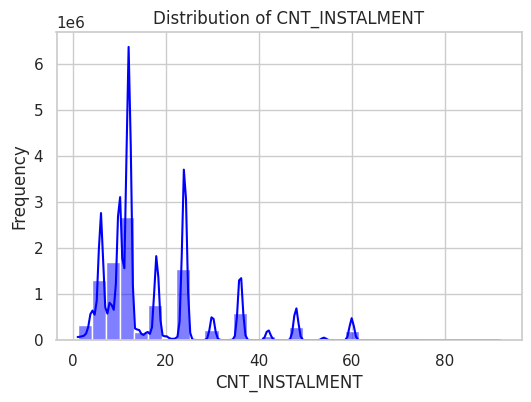

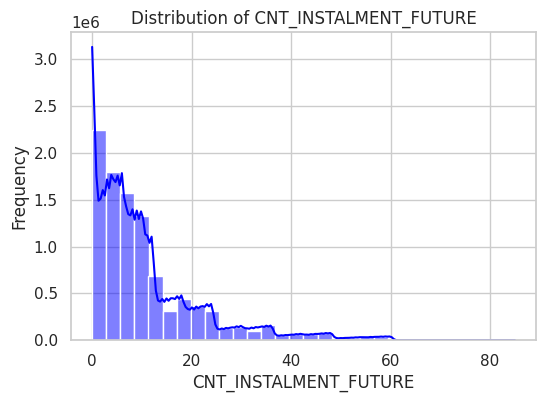

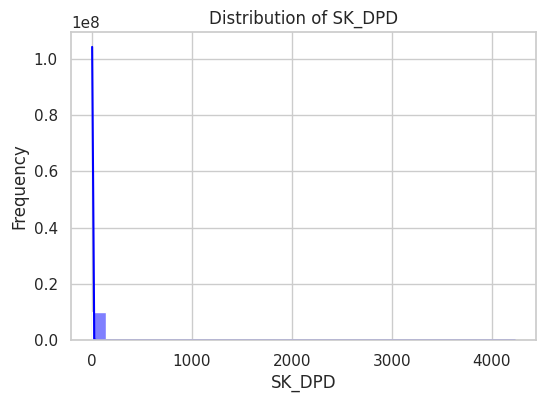


### Unique IDs in SK_ID_CURR: 337252

### POS CASH Balance: Features with High Missing Values ( > 50%) ###
[]


In [ ]:
missing_pos_cash_balance = eda_additional_dataset(pos_cash_balance, "POS CASH Balance", id_col="SK_ID_CURR")
high_missing_features_pos_cash_balance = missing_pos_cash_balance[missing_pos_cash_balance["Percentage"] > 50]["Feature"].tolist()
print("\n### POS CASH Balance: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_pos_cash_balance)


### Dataset Overview: Previous Application ###
Shape: (1670214, 37)

### Columns and Data Types:
+----+-----------------------------+-----------+
|    |           Column            | Data Type |
+----+-----------------------------+-----------+
| 0  |         SK_ID_PREV          |   int64   |
| 1  |         SK_ID_CURR          |   int64   |
| 2  |     NAME_CONTRACT_TYPE      |  object   |
| 3  |         AMT_ANNUITY         |  float64  |
| 4  |       AMT_APPLICATION       |  float64  |
| 5  |         AMT_CREDIT          |  float64  |
| 6  |      AMT_DOWN_PAYMENT       |  float64  |
| 7  |       AMT_GOODS_PRICE       |  float64  |
| 8  | WEEKDAY_APPR_PROCESS_START  |  object   |
| 9  |   HOUR_APPR_PROCESS_START   |   int64   |
| 10 | FLAG_LAST_APPL_PER_CONTRACT |  object   |
| 11 |   NFLAG_LAST_APPL_IN_DAY    |   int64   |
| 12 |      RATE_DOWN_PAYMENT      |  float64  |
| 13 |    RATE_INTEREST_PRIMARY    |  float64  |
| 14 |  RATE_INTEREST_PRIVILEGED   |  float64  |
| 15 |   NAME_CASH_L

<ipython-input-26-0e2c3a5779f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


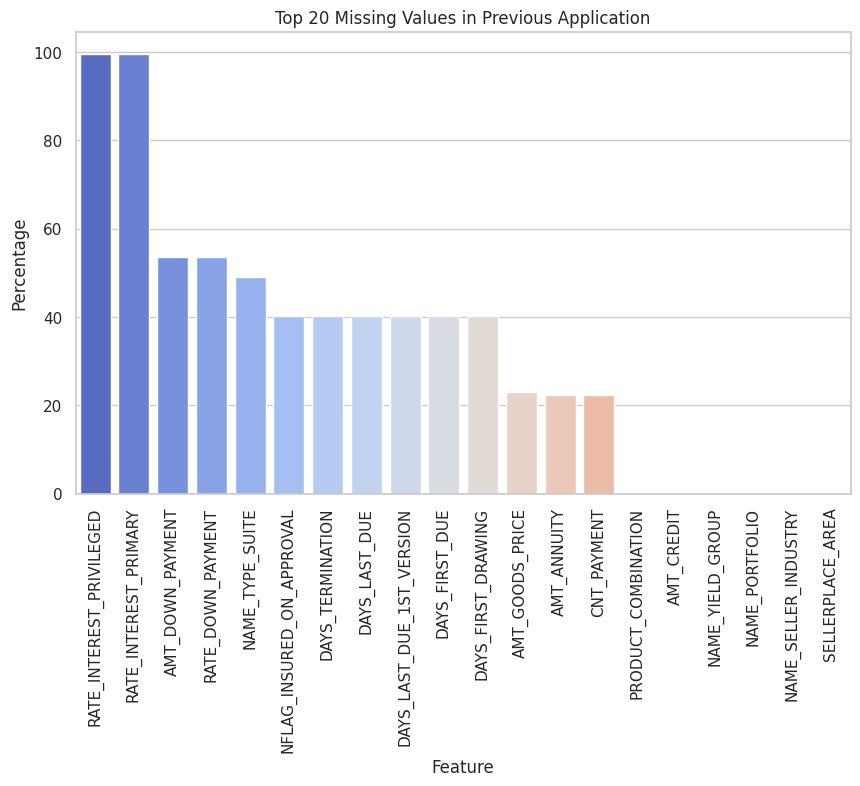


### Distribution of Numerical Features in Previous Application ###


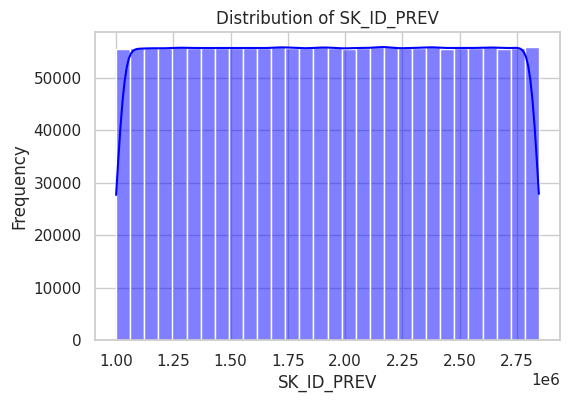

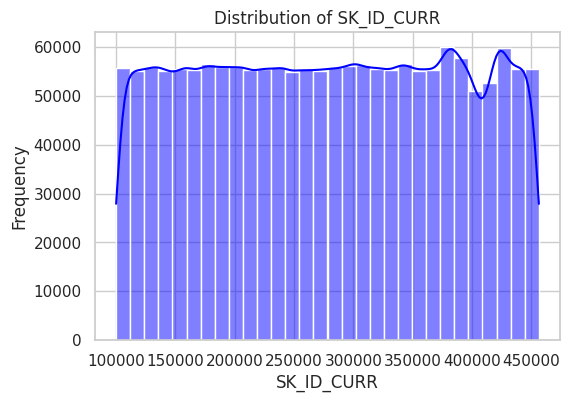

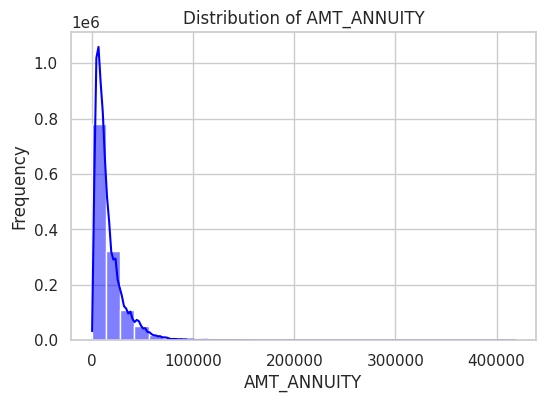

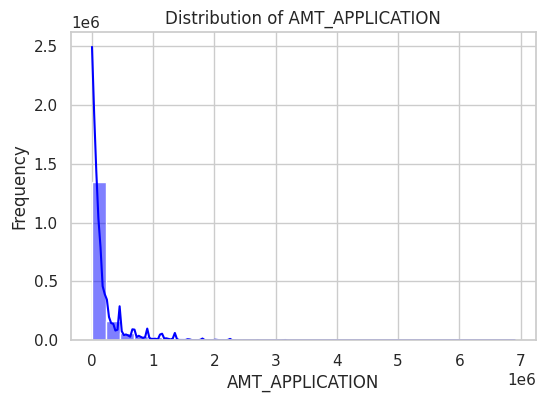

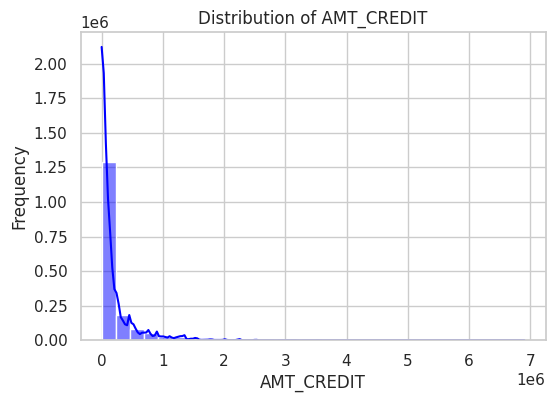

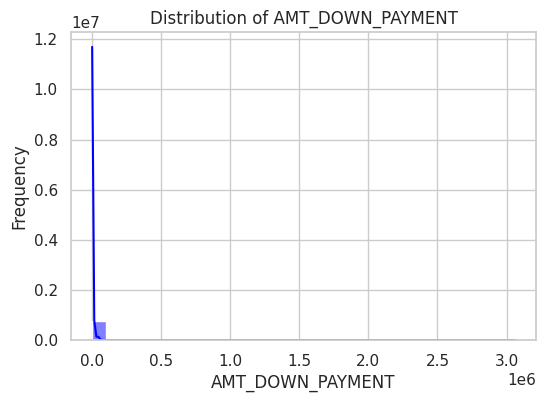


### Unique IDs in SK_ID_CURR: 338857

### Previous Application: Features with High Missing Values ( > 50%) ###
['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']


In [ ]:
missing_previous_application = eda_additional_dataset(previous_application, "Previous Application", id_col="SK_ID_CURR")
high_missing_features_previous_application = missing_previous_application[missing_previous_application["Percentage"] > 50]["Feature"].tolist()
print("\n### Previous Application: Features with High Missing Values ( > 50%) ###")
print(high_missing_features_previous_application)

In [4]:
bureau_balance['STATUS'] = bureau_balance['STATUS'].map({'C': 0, 'X': 1}).fillna(0)
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'STATUS': ['sum']
}).reset_index()
bureau_balance_agg.columns = ['_'.join(col) for col in bureau_balance_agg.columns]

bureau = bureau.merge(bureau_balance_agg, how='left', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU_')

bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['sum', 'mean', 'max'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean', 'max'],
    'DAYS_CREDIT': ['mean'],
    'STATUS_sum': ['mean']
}).reset_index()
bureau_agg.columns = ['SK_ID_CURR'] + ['BUREAU_' + '_'.join(col).strip() for col in bureau_agg.columns.droplevel(0)[1:]]

credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['sum', 'mean'],
    'AMT_PAYMENT_CURRENT': ['sum', 'mean'],
    'SK_DPD': ['sum']
}).reset_index()
credit_card_agg.columns = ['SK_ID_CURR'] + ['CREDIT_CARD_' + '_'.join(col).strip() for col in credit_card_agg.columns.droplevel(0)[1:]]

installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT': ['sum', 'mean'],
    'DAYS_ENTRY_PAYMENT': ['mean']
}).reset_index()
installments_agg.columns = ['SK_ID_CURR'] + ['INSTALLMENTS_' + '_'.join(col).strip() for col in installments_agg.columns.droplevel(0)[1:]]

pos_cash_agg = pos_cash_balance.groupby('SK_ID_CURR').agg({
    'CNT_INSTALMENT': ['sum'],
    'SK_DPD': ['sum']
}).reset_index()
pos_cash_agg.columns = ['SK_ID_CURR'] + ['POS_CASH_' + '_'.join(col).strip() for col in pos_cash_agg.columns.droplevel(0)[1:]]

previous_app_agg = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': ['mean'],
    'DAYS_DECISION': ['mean'],
    'CNT_PAYMENT': ['sum']
}).reset_index()
previous_app_agg.columns = ['SK_ID_CURR'] + ['PREVIOUS_' + '_'.join(col).strip() for col in previous_app_agg.columns.droplevel(0)[1:]]

datasets = [bureau_agg, credit_card_agg, installments_agg, pos_cash_agg, previous_app_agg]

for dataset in datasets:
    application_train = application_train.merge(dataset, on='SK_ID_CURR', how='left')
    application_test = application_test.merge(dataset, on='SK_ID_CURR', how='left')

In [5]:
missing_threshold = 50
missing_train = application_train.isnull().mean() * 100
missing_test = application_test.isnull().mean() * 100

cols_to_drop = missing_train[missing_train > missing_threshold].index
print(f"Columns dropped (train): {len(cols_to_drop)}")
print(cols_to_drop)

application_train.drop(columns=cols_to_drop, inplace=True)
application_test.drop(columns=cols_to_drop, inplace=True)

Columns dropped (train): 47
Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'BUREAU_m_e_a_n', 'CREDIT_CARD_s_u_m',
       'CREDIT_CARD_m_e_a_n',

In [6]:
def fill_column(col):
    """Mengisi missing values berdasarkan tipe data kolom."""
    if col.isna().any():
        if col.dtypes == 'object' or col.dtypes.name == 'category':
            if not col.mode().empty:
                return col.fillna(col.mode().iloc[0])
        else:
            if not col.dropna().empty:
                return col.fillna(col.median())
            else:
                return col.fillna(0)
    return col

application_train = application_train.apply(fill_column, axis=0)
application_test = application_test.apply(fill_column, axis=0)

print("\n### Missing Values After Filling ###")
print(application_train.isnull().sum().sum(), "missing values in train")
print(application_test.isnull().sum().sum(), "missing values in test")


### Missing Values After Filling ###
0 missing values in train
0 missing values in test


In [7]:
categorical_cols_train = application_train.select_dtypes(include='object').columns
categorical_cols_test = application_test.select_dtypes(include='object').columns

assert set(categorical_cols_train) == set(categorical_cols_test), "Kategorikal kolom tidak konsisten antara train dan test"

In [8]:
le = LabelEncoder()
for col in categorical_cols_train:
    application_train[col] = le.fit_transform(application_train[col].astype(str))
    application_test[col] = le.transform(application_test[col].astype(str))

print("\n### Categorical Encoding Complete ###")
print("Encoded Columns:", categorical_cols_train.tolist())


### Categorical Encoding Complete ###
Encoded Columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [9]:
numeric_cols_train_final = set(application_train.select_dtypes(include=np.number).columns) - {"TARGET", "SK_ID_CURR"}
numeric_cols_test_final = set(application_test.select_dtypes(include=np.number).columns) - {"SK_ID_CURR"}

missing_in_test_final = numeric_cols_train_final - numeric_cols_test_final
missing_in_train_final = numeric_cols_test_final - numeric_cols_train_final

print("Kolom numerik hilang di test (final):", missing_in_test_final)
print("Kolom numerik hilang di train (final):", missing_in_train_final)

assert numeric_cols_train_final == numeric_cols_test_final, "Kolom numerik tidak konsisten antara train dan test"

assert "SK_ID_CURR" not in numeric_cols_train_final, "SK_ID_CURR masih ada di numeric_cols_train_final"
assert "SK_ID_CURR" not in numeric_cols_test_final, "SK_ID_CURR masih ada di numeric_cols_test_final"

numeric_cols = list(numeric_cols_train_final)

Kolom numerik hilang di test (final): set()
Kolom numerik hilang di train (final): set()


In [11]:
scaler = MinMaxScaler()

application_train[numeric_cols] = scaler.fit_transform(application_train[numeric_cols])
application_test[numeric_cols] = scaler.transform(application_test[numeric_cols])

print("\n### Numerical Scaling Complete ###")
print(f"Scaled Columns: {len(numeric_cols)} numeric columns")


### Numerical Scaling Complete ###
Scaled Columns: 86 numeric columns


In [12]:
from imblearn.over_sampling import SMOTE

X = application_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = application_train['TARGET']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Sebelum Oversampling:", y.value_counts())
print("Setelah Oversampling:", pd.Series(y_resampled).value_counts())

Sebelum Oversampling: TARGET
0    282686
1     24825
Name: count, dtype: int64
Setelah Oversampling: TARGET
1    282686
0    282686
Name: count, dtype: int64


In [13]:
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

X_train, X_val, y_train, y_val = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Distribusi Target di y_train:", np.bincount(y_train) / len(y_train))
print("Distribusi Target di y_val:", np.bincount(y_val) / len(y_val))

Distribusi Target di y_train: [0.49999889 0.50000111]
Distribusi Target di y_val: [0.50000442 0.49999558]


In [22]:
lr_default = LogisticRegression(max_iter=1000, random_state=42)
lr_default.fit(X_train, y_train)

y_val_pred_lr = lr_default.predict_proba(X_val)[:, 1]

roc_auc_lr = roc_auc_score(y_val, y_val_pred_lr)
print("Logistic Regression (tanpa tuning) ROC-AUC:", roc_auc_lr)

y_val_pred_lr_class = (y_val_pred_lr > 0.5).astype(int)
print("\nConfusion Matrix Logistic Regression (tanpa tuning):")
print(confusion_matrix(y_val, y_val_pred_lr_class))
print("\nClassification Report Logistic Regression (tanpa tuning):")
print(classification_report(y_val, y_val_pred_lr_class))

Logistic Regression (tanpa tuning) ROC-AUC: 0.7616907781002635

Confusion Matrix Logistic Regression (tanpa tuning):
[[39286 17252]
 [16997 39540]]

Classification Report Logistic Regression (tanpa tuning):
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     56538
           1       0.70      0.70      0.70     56537

    accuracy                           0.70    113075
   macro avg       0.70      0.70      0.70    113075
weighted avg       0.70      0.70      0.70    113075



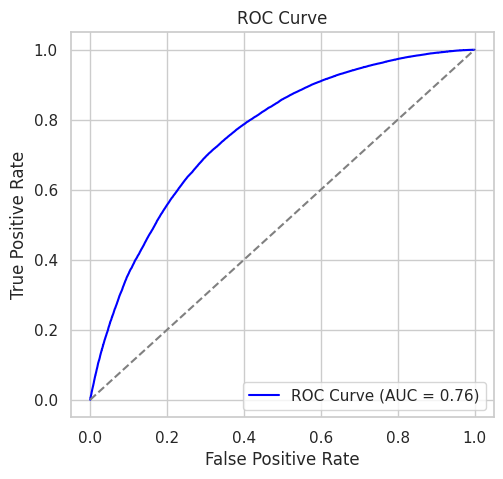

In [23]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

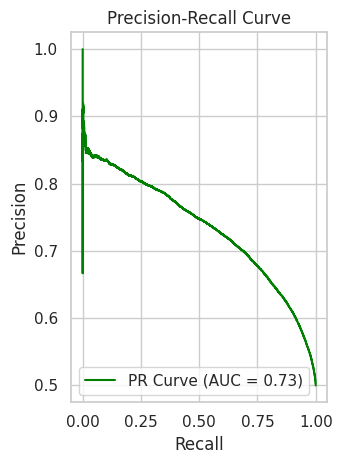

In [24]:
precision, recall, _ = precision_recall_curve(y_val, y_val_pred_lr)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
param_distributions_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

random_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_distributions_lr,
    n_iter=10,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=42
)

random_lr.fit(X_train, y_train)

best_lr = random_lr.best_estimator_
print("\nBest Logistic Regression Parameters:", random_lr.best_params_)

y_val_pred_lr_tuned = best_lr.predict_proba(X_val)[:, 1]
roc_auc_lr_tuned = roc_auc_score(y_val, y_val_pred_lr_tuned)
print("Logistic Regression (dengan tuning) ROC-AUC:", roc_auc_lr_tuned)

y_val_pred_lr_tuned_class = (y_val_pred_lr_tuned > 0.5).astype(int)
print("\nConfusion Matrix Logistic Regression (dengan tuning):")
print(confusion_matrix(y_val, y_val_pred_lr_tuned_class))
print("\nClassification Report Logistic Regression (dengan tuning):")
print(classification_report(y_val, y_val_pred_lr_tuned_class))

In [ ]:
fpr_tuned, tpr_tuned, _ = roc_curve(y_val, y_val_pred_lr_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned)')
plt.legend(loc='lower right')

In [ ]:
precision_tuned, recall_tuned, _ = precision_recall_curve(y_val, y_val_pred_lr_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)

plt.subplot(1, 2, 2)
plt.plot(recall_tuned, precision_tuned, color='green', label=f'PR Curve (AUC = {pr_auc_tuned:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Tuned)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [14]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

y_val_pred_dt = dt_default.predict_proba(X_val)[:, 1]

roc_auc_dt = roc_auc_score(y_val, y_val_pred_dt)
print("Decision Tree (tanpa tuning) ROC-AUC:", roc_auc_dt)

y_val_pred_dt_class = (y_val_pred_dt > 0.5).astype(int)
print("\nConfusion Matrix Decision Tree (tanpa tuning):")
print(confusion_matrix(y_val, y_val_pred_dt_class))
print("\nClassification Report Decision Tree (tanpa tuning):")
print(classification_report(y_val, y_val_pred_dt_class))

Decision Tree (tanpa tuning) ROC-AUC: 0.9012161074899097

Confusion Matrix Decision Tree (tanpa tuning):
[[50311  6227]
 [ 4943 51594]]

Classification Report Decision Tree (tanpa tuning):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     56538
           1       0.89      0.91      0.90     56537

    accuracy                           0.90    113075
   macro avg       0.90      0.90      0.90    113075
weighted avg       0.90      0.90      0.90    113075



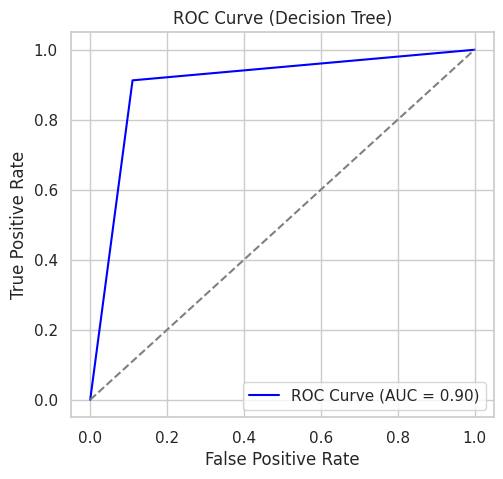

In [15]:
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_val_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc='lower right')

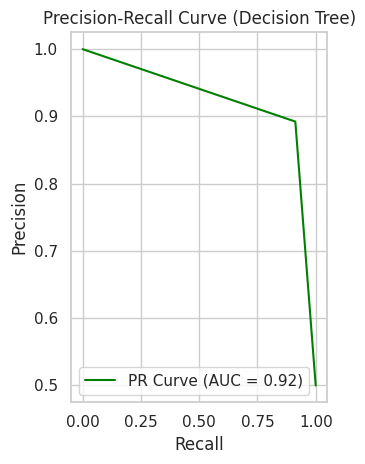

In [16]:
precision_dt, recall_dt, _ = precision_recall_curve(y_val, y_val_pred_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

plt.subplot(1, 2, 2)
plt.plot(recall_dt, precision_dt, color='green', label=f'PR Curve (AUC = {pr_auc_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
param_distributions_dt = {
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

random_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions_dt,
    n_iter=10,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=42
)

random_dt.fit(X_train, y_train)

best_dt = random_dt.best_estimator_
print("\nBest Decision Tree Parameters:", random_dt.best_params_)

y_val_pred_dt_tuned = best_dt.predict_proba(X_val)[:, 1]
roc_auc_dt_tuned = roc_auc_score(y_val, y_val_pred_dt_tuned)
print("Decision Tree (dengan tuning) ROC-AUC:", roc_auc_dt_tuned)

y_val_pred_dt_tuned_class = (y_val_pred_dt_tuned > 0.5).astype(int)
print("\nConfusion Matrix Decision Tree (dengan tuning):")
print(confusion_matrix(y_val, y_val_pred_dt_tuned_class))
print("\nClassification Report Decision Tree (dengan tuning):")
print(classification_report(y_val, y_val_pred_dt_tuned_class))

In [ ]:
fpr_tuned, tpr_tuned, _ = roc_curve(y_val, y_val_pred_dt_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Decision Tree)')
plt.legend(loc='lower right')

In [ ]:
precision_tuned, recall_tuned, _ = precision_recall_curve(y_val, y_val_pred_dt_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)

plt.subplot(1, 2, 2)
plt.plot(recall_tuned, precision_tuned, color='green', label=f'PR Curve (AUC = {pr_auc_tuned:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Tuned Decision Tree)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
from joblib import dump, load

import os
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

scaler_path = os.path.join(save_dir, "scaler.pkl")
numeric_cols_path = os.path.join(save_dir, "numeric_cols.pkl")
lr_default_path = os.path.join(save_dir, "logistic_regression_default.pkl")
lr_tuned_path = os.path.join(save_dir, "logistic_regression_tuned.pkl")
dt_default_path = os.path.join(save_dir, "decision_tree_default.pkl")
dt_tuned_path = os.path.join(save_dir, "decision_tree_tuned.pkl")

dump(scaler, scaler_path)
print(f"Scaler disimpan di {scaler_path}")

dump(numeric_cols, numeric_cols_path)
print(f"Kolom numerik disimpan di {numeric_cols_path}")

dump(lr_default, lr_default_path)
print(f"Model Logistic Regression (tanpa tuning) disimpan di {lr_default_path}")

#dump(best_lr, lr_tuned_path)
#print(f"Model Logistic Regression (dengan tuning) disimpan di {lr_tuned_path}")

dump(dt_default, dt_default_path)
print(f"Model Decision Tree (tanpa tuning) disimpan di {dt_default_path}")

#dump(best_dt, dt_tuned_path)
#print(f"Model Decision Tree (dengan tuning) disimpan di {dt_tuned_path}")

In [ ]:
loaded_scaler = load(scaler_path)
print(f"Scaler dimuat dari {scaler_path}")

loaded_numeric_cols = load(numeric_cols_path)
print(f"Kolom numerik dimuat dari {numeric_cols_path}")

loaded_lr_default = load(lr_default_path)
print(f"Model Logistic Regression (tanpa tuning) dimuat dari {lr_default_path}")

loaded_lr_tuned = load(lr_tuned_path)
print(f"Model Logistic Regression (dengan tuning) dimuat dari {lr_tuned_path}")

loaded_dt_default = load(dt_default_path)
print(f"Model Decision Tree (tanpa tuning) dimuat dari {dt_default_path}")

loaded_dt_tuned = load(dt_tuned_path)
print(f"Model Decision Tree (dengan tuning) dimuat dari {dt_tuned_path}")

In [19]:
y_test_pred_dt = dt_default.predict_proba(application_test.drop(columns=["SK_ID_CURR"]))[:, 1]

submission_dt = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": y_test_pred_dt
})

features_to_include = ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']
for feature in features_to_include:
    submission_dt[feature] = application_test[feature]

submission_dt.to_csv("submission.csv", index=False)
print("Submission file for DT saved as 'submission.csv'")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Submission file for DT saved as 'submission.csv'


In [20]:
print("\nPreview File Submission:")
print(submission_dt.head())
print("\nSubmission Summary:")
print(submission_dt.describe())


Preview File Submission:
   SK_ID_CURR  TARGET  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH
0      100001     0.0    0.130787     0.073886    0.337542
1      100005     0.0    0.044387     0.061443    0.403890
2      100013     0.0    0.154373     0.265830    0.292616
3      100028     0.0    0.382022     0.184872    0.634329
4      100038     0.0    0.144944     0.118761    0.687091

Submission Summary:
          SK_ID_CURR        TARGET    AMT_CREDIT   AMT_ANNUITY    DAYS_BIRTH
count   48744.000000  48744.000000  48744.000000  48744.000000  48744.000000
mean   277796.676350      0.120035      0.117788      0.108456      0.516399
std    103169.547296      0.325006      0.091235      0.062449      0.243850
min    100001.000000      0.000000      0.000000      0.002650      0.001917
25%    188557.750000      0.000000      0.053843      0.063794      0.315220
50%    277549.000000      0.000000      0.101124      0.095876      0.532356
75%    367555.500000      0.000000      0.157303      0.1395